In [8]:
!pip install opencv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [99]:
import os
dir = os.chdir('/content/drive/Shareddrives/Deep Learning/2022-DL/손글씨데이터/3/')
fnames = os.listdir(dir)
print(fnames)

['23.jpg', '13.jpg', '3.jpg', 'photo3.jpg', 'photo_23.jpg', 'photo_13.jpg', '이름 없는 노트북-04.jpg', '이름 없는 노트북-14.jpg', '이름 없는 노트북-24.jpg', '이름 없는 노트북-34.jpg', '이름 없는 노트북-44.jpg', '이름 없는 노트북-54.jpg', '이름 없는 노트북-64.jpg', '이름 없는 노트북-74.jpg']


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [81]:
def findDigitsFromImage(im, thresh = 100, maxval=230, counts=1, margin= 3, gaussian=True):
  img = cv2.imread(im)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  if gaussian:
    img = cv2.GaussianBlur(img, (5, 5), 0)
  ret, img_th = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
  contours, hierachy= cv2.findContours(img_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  rects = [cv2.boundingRect(each) for each in contours]
  if len(rects) != counts:
    print('탐지 오류 thresh값 재조정')
    return
  img_result = []
  img_for_class = img.copy()

  margin_pixel = margin

  for rect in rects:
      #[y:y+h, x:x+w]
      if rect[1] > margin_pixel and rect[0] > margin_pixel:
        img_result.append(
            img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel, 
                          rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel])
      else:
        img_result.append(
            img_for_class[rect[1] : rect[1]+rect[3]+margin_pixel, 
                          rect[0] : rect[0]+rect[2]+margin_pixel])
  return img_result


In [76]:
def change_contrast(img):
    const = np.max(img) - np.min(img)
    factor = np.arange(1, 10)
    factor = np.max(factor[factor*const<255])
    factor -=1
    new = np.where(factor * img > 255, 255, factor * img)
    return new

In [77]:
def imgProcess(img):
  resize = cv2.resize(img, (28,28))
  return change_contrast(resize)
  

23.jpg
13.jpg
3.jpg
photo3.jpg
photo_23.jpg
photo_13.jpg
이름 없는 노트북-04.jpg
이름 없는 노트북-14.jpg
이름 없는 노트북-24.jpg
이름 없는 노트북-34.jpg
이름 없는 노트북-44.jpg
이름 없는 노트북-54.jpg
이름 없는 노트북-64.jpg
이름 없는 노트북-74.jpg


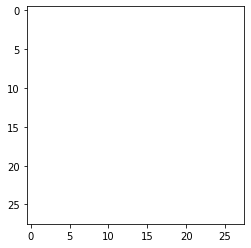

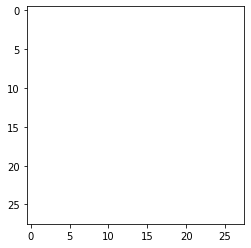

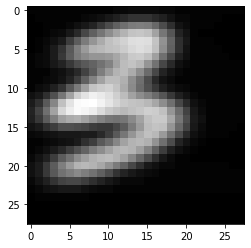

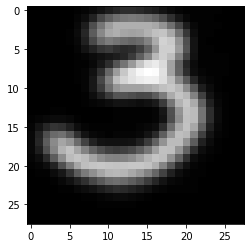

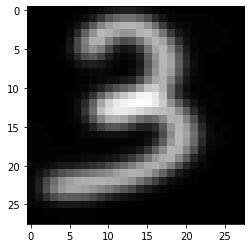

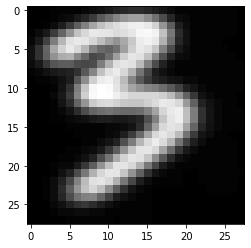

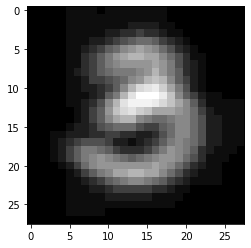

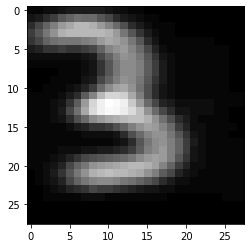

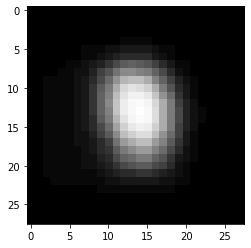

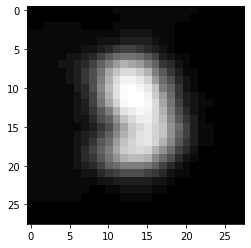

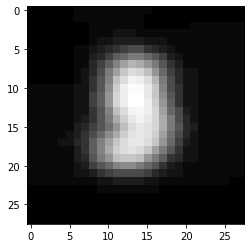

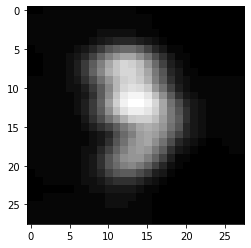

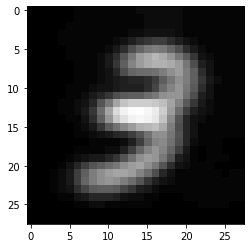

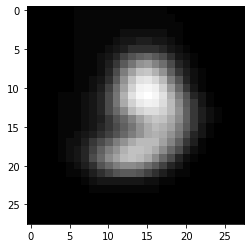

In [100]:
for f in fnames:
  print(f)
  imgs = findDigitsFromImage(f, 252, 250)
  if imgs== None:
    break
  for i in imgs:
    img = imgProcess(i)
    plt.figure()
    plt.imshow(img, cmap='Greys')
    f += '_edit.jpg'
    cv2.imwrite(f, img)